<a href="https://colab.research.google.com/github/Aarunimaa/Personal-Projects/blob/main/Handwritten_Digits_Recognition_using_Keras(Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Recognition using Neural Network**

The **MNIST dataset** is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 28x28 pixel grayscale images of handwritten digits from 0 to 9. The dataset contains 60,000 training images and 10,000 testing images. Each image is associated with a label indicating the digit it represents. The goal is to build a model that can accurately classify these digits.

I employed **Keras**, a high-level deep learning library, to create and train a **neural network model** for the MNIST dataset. After loading and preprocessing the data, I designed the model architecture using Keras' intuitive Sequential API, configuring layers like convolutional and dense layers. Compiling the model involved specifying the optimizer, loss function, and evaluation metric. Through the .fit() method, I trained the model on the training data, monitored its performance on validation data, and evaluated it using the test dataset. Keras simplified this process by abstracting complex computations, making it easy to build, train, and evaluate neural networks, all while offering tools to visualize training progress and achieve accurate predictions.

## **Importing required Packages**

In [76]:
from keras.datasets import mnist # the dataset on which we will be working

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator
from sklearn.model_selection import RandomizedSearchCV
import itertools

from keras.utils.np_utils import to_categorical # to convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', palette='deep')

## **Load and View**

### **Loading and Splitting the Data**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


This directly loads the data from keras.datasets() and divides it nto test and training sets along with label and pixel values already separated as X and Y.

### **Displaying Few Digits**

I have displayed a few digits from the dataset for a better understanding.

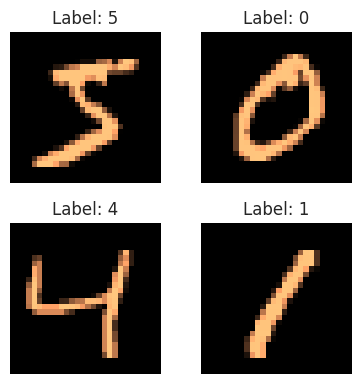

In [5]:
example_digit_indices = [0, 1, 2, 3]  # Change these indices to display different digits

# Display the selected digits in a 2x2 grid
plt.figure(figsize=(4,4))
for i, index in enumerate(example_digit_indices):
    plt.subplot(2, 2, i + 1)
    plt.imshow(x_train[index], cmap='copper')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Data Preprocessing**

### **Converting the data into float type**

 Many machine learning algorithms, including neural networks, work more efficiently and stably with numerical data. Using floating-point representations ensures that computations involving these values maintain a consistent precision, reducing the risk of numerical instability issues. Converting input features and target labels to float is a standard practice that ensures numerical stability, compatibility with neural network operations, and optimal performance during training.

In [6]:
x_train=x_train.astype('float32')
y_train=y_train.astype('float32')
x_test=x_test.astype('float32')
y_test=y_test.astype('float32')

### **Displaying the Number of Digits Present**

We can visualize what is the count of each digit present in the MNIST dataset.

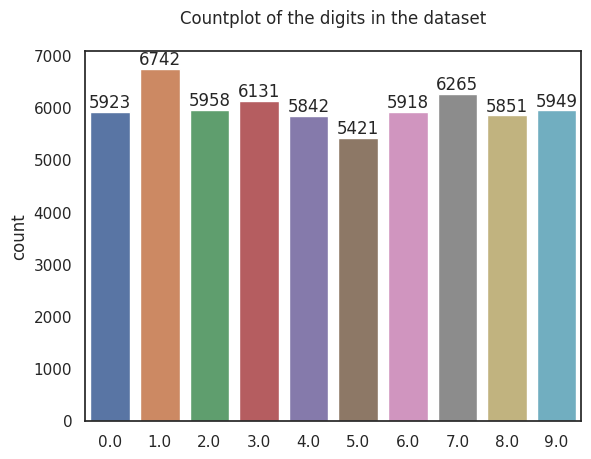

In [7]:
g = sns.countplot(x=y_train)
for p in g.patches:
    g.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title("Countplot of the digits in the dataset",pad=20)
plt.show()

### **Normalizing the Data**

Normalized data helps optimization algorithms converge faster and more consistently. Neural networks use gradient-based optimization techniques like gradient descent to update model parameters. When input features are on different scales, some features might dominate the learning process, leading to slower convergence or getting stuck in local minima. Normalization is essential for creating a well-behaved training process, promoting convergence, improving generalization, and ensuring that neural networks learn effectively from the data.

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0

### **Reshaping the Data**

Neural networks, including deep learning models, often expect input data to be in a specific shape. For example, **convolutional neural networks** (CNNs) require input data to have a 3D shape (height, width, channels), while fully connected layers often require flattened (1D) input data. Reshaping is necessary to ensure that our input data matches the expected shape of the neural network model. This step is essential for compatibility, efficient processing, and effective training of the model.

In [9]:
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

### **Converting the Digits to Category Datatype**

Converting the target labels (y) to categorical format, often referred to as **one-hot encoding**, is a common practice when working with classification tasks, especially in deep learning and neural networks.

In classification problems with multiple classes (like the MNIST dataset, where **digits range from 0 to 9**), one-hot encoding helps represent the classes as distinct binary vectors. **Each vector has a single "1" (indicating the true class) and "0"s for other classes**. This format is suitable for training neural networks to predict multi-class labels. Neural networks process numerical data. One-hot encoding provides a numerical representation of categorical labels, allowing neural networks to handle them efficiently during computations. Converting y to categorical or one-hot encoded format is crucial for ensuring that neural networks can effectively learn and make predictions for multi-class classification tasks. It simplifies loss computation, gradient calculation, and model interpretation while aligning with the requirements of neural network architectures and libraries.

In [10]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## **Defining the Model**

The code below describes the architecture of a **convolutional neural network (CNN)** using the **Keras Sequential API** for image classification tasks on the MNIST dataset.
This code below describes a CNN with multiple convolutional, pooling, and fully connected layers, along with dropout layers for regularization. It's designed to extract features from input images and classify them into one of the **10 digit classes** using the **softmax activation** function.

In [53]:
defined_model = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

**1. Convolutional Layer 1:**

 *Conv2D(filters=32, kernel_size=(5, 5), padding='Same',activation='relu', input_shape=(28, 28, 1))*\
First convolutional layer with 32 filters (feature detectors) of size 5x5.\
'Same' padding preserves the input image size.\
ReLU activation function introduces non-linearity.\
input_shape defines the shape of input images (28x28 pixels, 1 channel for grayscale images).

**2. Convolutional Layer 2:**

*Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')*\
Second convolutional layer with 32 filters of size 5x5.\
'Same' padding and ReLU activation.

**3. MaxPooling Layer 1:**

*MaxPool2D(pool_size=(2, 2))*\
Max-pooling layer with a pool size of 2x2 to downsample feature maps.

**4. Dropout Layer 1:**

*Dropout(0.25)*\
Regularization layer that randomly drops 25% of neuron outputs during training to prevent overfitting.

**5. Convolutional Layer 3:**

*Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu')*\
Third convolutional layer with 64 filters of size 3x3.

**6. Convolutional Layer 4:**

*Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu')*\
Fourth convolutional layer with 64 filters of size 3x3.

**7. MaxPooling Layer 2:**

*MaxPool2D(pool_size=(2, 2), strides=(2, 2))*\
Max-pooling layer with a pool size of 2x2 and a stride of 2x2.

**8. Dropout Layer 2:**

*Dropout(0.25)*\
Regularization layer, same as Dropout Layer 1.

**9. Flatten Layer:**

*Flatten()*\
Flattens the 2D feature maps into a 1D vector.

**10. Dense Layer 1:**

*Dense(256, activation='relu')*\
Fully connected layer with 256 neurons and ReLU activation.

**11. Dropout Layer 3:**

*Dropout(0.5)*\
Regularization layer that randomly drops 50% of neuron outputs during training.

**12. Dense Layer 2 (Output Layer):**

*Dense(10, activation='softmax')*\
Fully connected output layer with 10 neurons (one for each digit class) and softmax activation to produce class probabilities.

## **Hyperparameter Tuning**

Hyperparameter tuning is essential for maximizing the potential of machine learning models. It helps achieve better performance, prevents overfitting, saves time and resources, and tailors the model to the specific characteristics of the data and problem at hand.

### **Random Search**

Random search is a hyperparameter optimization technique used to find the best combination of hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned during training but need to be set before training, such as learning rate, number of hidden units in a neural network, or regularization strength.

In contrast to grid search, where you exhaustively try all possible combinations of hyperparameters from predefined grids, random search randomly samples combinations of hyperparameters from specified distributions. This approach can be more efficient and effective in finding good hyperparameters, especially when the search space is large.

In [96]:
# Define a function to create the Keras model
def create_keras_model(learning_rate=0.001):
    model = defined_model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper
keras_classifier = KerasClassifier(build_fn=create_keras_model, verbose=0)


<ipython-input-96-4c5b80b54285>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_keras_model, verbose=0)


The create_keras_model function is designed to create a Keras neural network model with a specified learning rate for the optimizer. The KerasClassifier wrapper then utilizes this function to create a scikit-learn-compatible classifier that can be used for various tasks like hyperparameter tuning, cross-validation, and more. The defined_model should be previously defined elsewhere in your code and contains the architecture of the neural network model you want to use.

**Define initial hyperparameter distributions for random search**

I have defined a set of values for three of the hyperparameters to be tuned. These values will be used in the random search algorithm to obtain the best possible combination.

In [81]:
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

**Initializing the random search and fitting on the training data**

In [89]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=keras_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

# Perform random search on training data
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7a95600b98a0>,
                   n_jobs=-1,
                   param_distributions={'batch_size': [16, 32, 64],
                                        'epochs': [10, 20, 30],
                                        'learning_rate': [0.001, 0.01, 0.1]},
                   scoring='accuracy', verbose=1)

 A hyperparameter tuning process using scikit-learn's RandomizedSearchCV is used to find the optimal set of hyperparameters for your Keras neural network model. The goal is to improve the model's performance on the training data and, consequently, its generalization to unseen data.

 The fit method of the RandomizedSearchCV class iterates over the specified number of parameter settings, trains the keras_classifier on different combinations of hyperparameters, and evaluates their performance using cross-validation. The training data x_train and corresponding labels y_train are provided to the search.

**Best Values**

The best combination is obtained.

In [97]:
# Print the best parameters and score
print("Best parameters:", random_search.best_params_)

Best parameters: {'learning_rate': 0.01, 'epochs': 20, 'batch_size': 16}


**Stroing for further use**

In [92]:
best_epochs = random_search.best_params_['epochs']
best_batch_size = random_search.best_params_['batch_size']
best_learning_rate = random_search.best_params_['learning_rate']

Thus we have the best combination of our hyperparameters which we can now use to obtain the best results.

### **Defining the Optimizier and Compiling the Model**

The term "optimizer" refers to an algorithm used to update the weights and biases of the network during training. Optimizers play a crucial role in minimizing the loss function by adjusting the model's parameters iteratively. Common optimizers include stochastic gradient descent (SGD), Adam, RMSProp, and Adagrad. The **RMSprop optimizer** is a popular choice for training neural networks. It adapts the learning rate for each parameter based on the historical gradient information.

After defining the optimizer, I have compiled the neural network model. Compilation involves specifying additional aspects of how the model should be trained.


In [93]:
# Define the optimizer
optimizer = RMSprop(
    learning_rate=best_learning_rate,   # Optimum learning rate for the optimizer.
    rho=0.9,               # Exponential moving average decay factor for squared gradients.
    epsilon=1e-08,         # Small value added to the denominator to prevent division by zero.
    decay=0.0              # Learning rate decay over each update.
)

# Compile the model
model.compile(
    optimizer=optimizer,   # Optimizer instance to be used for training.
    loss='categorical_crossentropy',  # Loss function for optimization.
    metrics=['accuracy']   # List of evaluation metrics to monitor during training.
)

### **Setting Epoch and Batch Size**

'epochs' and 'batch_size' are crucial hyperparameters in training a neural network. epochs controls how many times the model learns from the entire dataset, while batch_size determines the number of examples used in each update iteration. Balancing these values is essential for achieving good convergence and generalization performance during training.

In [94]:
epochs = best_epochs          # Number of times the entire dataset is passed through the model during training.
batch_size = best_batch_size     # Number of samples processed in each iteration during training.

## **Model FItting**

### **Without Data Augmentation**

**Fitting the model**

In [15]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, y_test))

698/698 [==============================] - 487s 696ms/step - loss: 0.1833 - accuracy: 0.9430 - val_loss: 0.0385 - val_accuracy: 0.9869


The fit() method is a core step in training a neural network model, where the model learns from the training data, adjusts its weights, and improves its ability to make accurate predictions. The training process involves multiple iterations (epochs), and the history object captures important information about this process for analysis and visualization.

**Testing Model Efficiency**

 Train and test loss measure prediction error, while train and test accuracy measure prediction correctness.

In [16]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1875/1875 [==============================] - 106s 57ms/step - loss: 0.0447 - accuracy: 0.9870
Training Loss: 0.0447
Training Accuracy: 0.9870
313/313 [==============================] - 17s 55ms/step - loss: 0.0385 - accuracy: 0.9869
Test Loss: 0.0385
Test Accuracy: 0.9869


*We can see that training accuracy is more than test accuracy, hence there is overfitting in our model. So, we will use **data augmentation** to remove the overfitting and get better test accuracy scores.*

**Confusion Matrix**

Plotting a confusion matrix provides a compact and informative visualization of a classification model's performance. It helps us identify patterns in classification errors and guides us in making decisions to enhance the model's accuracy and generalization.

313/313 [==============================] - 16s 51ms/step


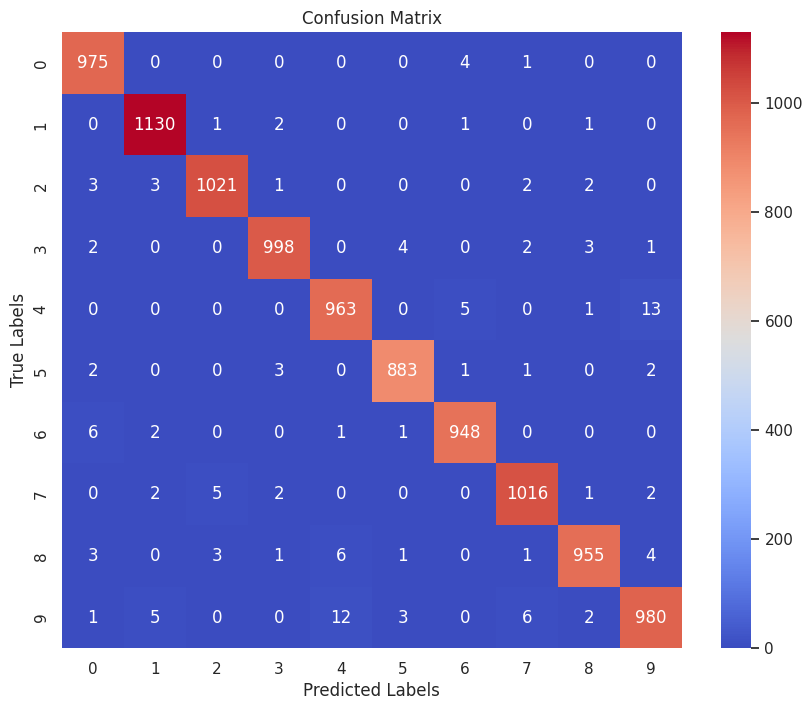

In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # to find the position (index) of the maximum value along the column of y_pred
y_true = np.argmax(y_test, axis=1)

# Computing confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### **With Data Augmentation**

Data augmentation is a technique used in machine learning, particularly in computer vision tasks, to **artificially expand the size of a dataset** by creating variations of existing data points. This is achieved through various transformations applied to the original data, resulting in new instances that are realistic and **representative of the original data distribution**. Data augmentation is commonly used to improve the generalization and robustness of machine learning models, especially neural networks.\
Increasing the diversity of training data can **help prevent overfitting**, where a model performs well on training data but poorly on new, unseen data.

**Defining the data augmentation model**

In [19]:
# Define data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,          # Range of rotation angles (in degrees) for randomly rotating images.
    zoom_range=0.1,             # Range for random zooming (e.g., zooming in or out) of images.
    width_shift_range=0.1,      # Range for random horizontal shifting (fraction of total width) of images.
    height_shift_range=0.1,     # Range for random vertical shifting (fraction of total height) of images.
    horizontal_flip=False,      # Whether to perform random horizontal flipping of images.
    vertical_flip=False)        # Whether to perform random vertical flipping of images.

The ImageDataGenerator creates variations of the original images by applying these transformations, effectively augmenting the dataset and introducing diversity for better model training. These augmented images are then used during model training to improve the model's ability to generalize to new, unseen data.

**Fitting the Model**

In [20]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),  # Fit the model using augmented data
                    steps_per_epoch=len(x_train) // batch_size,      # Number of steps (batches) per epoch
                    epochs=epochs,                                       # Number of epochs to train for
                    validation_data=(x_test, y_test),              # Validation data for monitoring performance
                    verbose=2)                                      # Verbosity level during training

697/697 - 347s - loss: 0.3755 - accuracy: 0.8795 - val_loss: 0.0463 - val_accuracy: 0.9845 - 347s/epoch - 498ms/step


The steps_per_epoch parameter ensures that the entire training dataset is processed in one epoch.

**Testing Model Efficiency**

To test the model efficiency, we calculate the training and test accuracy.

In [21]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1875/1875 [==============================] - 97s 52ms/step - loss: 0.0588 - accuracy: 0.9811
Training Loss: 0.0588
Training Accuracy: 0.9811
313/313 [==============================] - 17s 53ms/step - loss: 0.0463 - accuracy: 0.9845
Test Loss: 0.0463
Test Accuracy: 0.9845


*Now we see that test accuracy comes out be more than the training accuracy. Hence, the overfitting problem has been removed.*\
*Hence, Data Augmentation removes the problem of overfitting.*


**Confusion Matrix**

We plot the confusion matrix to visualize the misclassifications.

313/313 [==============================] - 16s 51ms/step


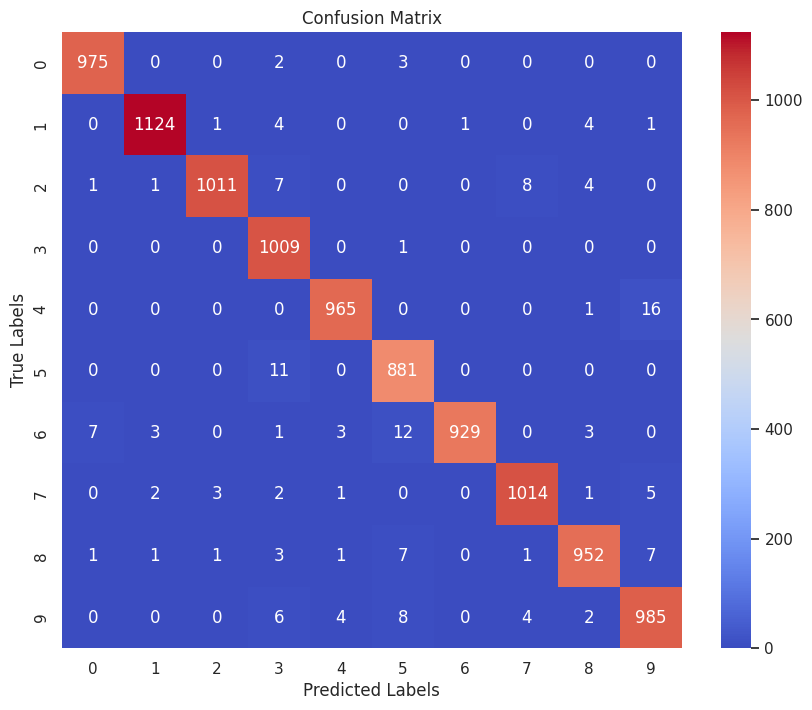

In [22]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Computing confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## **Misclassification Visualization**

 Misclassification plots provide a clear and informative way to assess the model's performance beyond just accuracy. They help uncover the nuances of the model's errors, which in turn can guide strategies for enhancing the model's accuracy and generalization capabilities.

### **Finding the Errors**

In [23]:
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

### **Displaying the Misclassified Digits**

I have displayed the digits along with their true and predicted labels to find out the common mistake patterns my model might make.

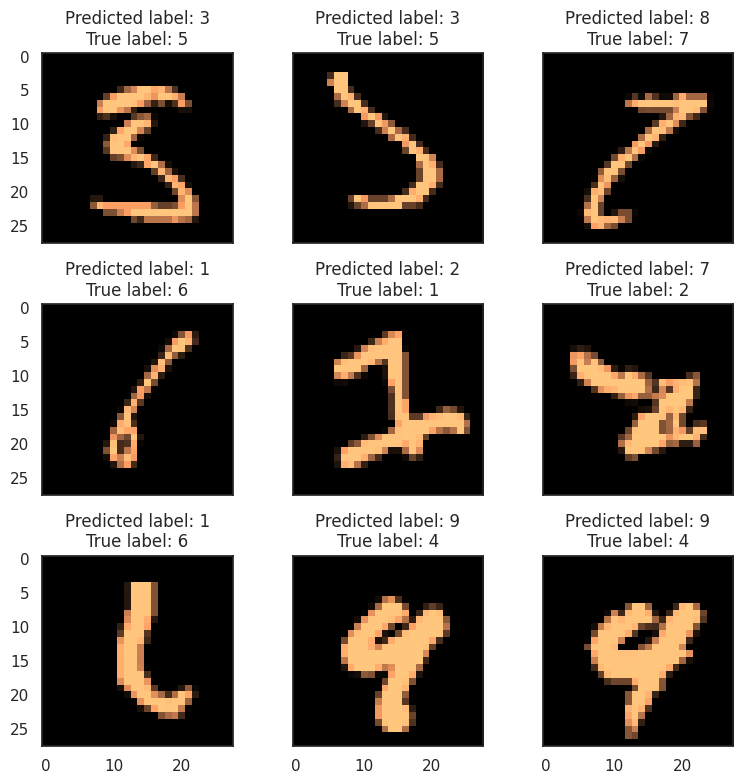

In [38]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    # This function shows 9 images with their predicted and real labels
    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, figsize=(8,8), sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row, col].imshow((img_errors[error]).reshape((28, 28)), cmap="copper")
            ax[row, col].set_title("Predicted label: {}\nTrue label: {}".format(pred_errors[error], obs_errors[error]))
            n += 1
    plt.tight_layout()
    plt.show()

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 9 errors
most_important_errors = sorted_dela_errors[-9:]

# Show the top 9 errors
display_errors(most_important_errors, x_test_errors, y_pred_classes_errors, y_true_errors)

From the plot it can be seen:


*   One of the common mistakes is the misclassification of visually similar digits. For example, a '4' might be misclassified as '9', or '3' as '5', due to the shared patterns in their shapes.
*   In some cases, digits that are ambiguous even for human observers can cause misclassifications. For instance, a handwritten digit that could be interpreted as both '1' and '6' might lead to confusion for the model as well.
* Some digits might share features with other digits, making them prone to misclassification. For instance, '2', '7' and '8' can have similar curved shapes in the handwriting.



